In [1]:
import cv2
import matplotlib.pyplot as plt

def visualize_yolo(image_path, label_path, class_names):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read the label file
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        # Parse the label line
        label_data = line.strip().split(' ')
        class_index = int(label_data[0])
        x, y, w, h = map(float, label_data[1:])

        # Convert YOLO coordinates to image coordinates
        img_height, img_width, _ = img.shape
        xmin = int((x - w / 2) * img_width)
        ymin = int((y - h / 2) * img_height)
        xmax = int((x + w / 2) * img_width)
        ymax = int((y + h / 2) * img_height)

        # Draw the bounding box
        class_name = class_names[class_index]
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(img, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

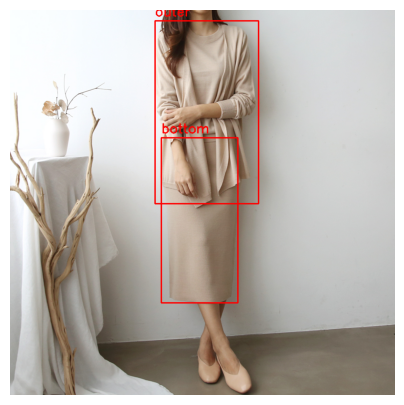

In [5]:
image_path = '/Users/young/Documents/DL_project/model_project/dataset/train/images/844.jpg'
label_path = '/Users/young/Documents/DL_project/model_project/dataset/train/labels/844.txt'
class_names = ['top', 'bottom', 'one', 'outer']  # 클래스 이름 리스트

visualize_yolo(image_path, label_path, class_names)

In [ ]:
!pip install 